# FERNANDO LON FRANCO

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [2]:
from gensim.models import KeyedVectors # Version 4.3.3

In [3]:
ruta = "/Users/ferleon/Github/GNvectors.bin"
model = KeyedVectors.load_word2vec_format(ruta, binary=True)

In [4]:
def pp(obj):
    print(pd.DataFrame(obj))

In [5]:
pp(model['table'])

            0
0   -0.144531
1   -0.026489
2    0.117676
3    0.213867
4   -0.042236
..        ...
295 -0.076660
296  0.069824
297 -0.095215
298 -0.098145
299 -0.012268

[300 rows x 1 columns]


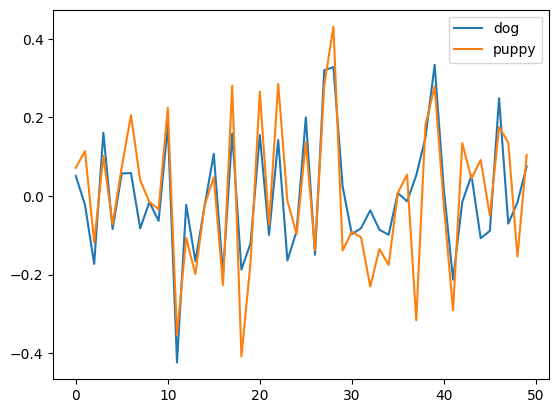

In [6]:
plt.plot(model['dog'][:50], label='dog')
plt.plot(model['puppy'][:50], label='puppy')
plt.legend()

In [7]:
palabras_similares = model.most_similar(positive=[u'small'])
pp(palabras_similares)

              0         1
0         large  0.733115
1          tiny  0.718793
2  medium_sized  0.642660
3         Small  0.627047
4       smaller  0.619429
5     minuscule  0.567684
6        larger  0.544681
7     mid_sized  0.532844
8      midsized  0.519831
9       sizable  0.517508


# Composicionalidad con operaciones líneales entre vectores

In [8]:
pp( model.most_similar(positive=["Germany", "airline"]))

                              0         1
0                     Lufthansa  0.735891
1                      airlines  0.637675
2  Deutsche_Lufthansa_AG_LHA.XE  0.621131
3                   Germanwings  0.618648
4                   Air_Polonia  0.608465
5                  Lufthansa_AG  0.600566
6                           ČSA  0.593416
7               Lufthansa_Cargo  0.592121
8         Deutsche_Lufthansa_AG  0.589482
9                     Eurowings  0.584023


In [9]:
pp( model.most_similar(positive=["Mexico", "airline"]))

                      0         1
0               Aeromar  0.662186
1  Mexicana_de_Aviacion  0.660330
2            Aeromexico  0.652928
3       carrier_Volaris  0.620648
4       airline_Volaris  0.612004
5              airlines  0.608609
6          Viva_Aerobus  0.603608
7               Volaris  0.601621
8            Aeroméxico  0.596508
9     Troubled_Mexicana  0.593978


In [10]:
pp( model.most_similar(positive=["love", "man"]))

                            0         1
0                       woman  0.615985
1                         boy  0.602711
2                       loved  0.563968
3                         guy  0.563804
4                       lover  0.561877
5                        girl  0.558718
6                       loves  0.549909
7  horribly_horribly_deranged  0.549648
8                    teenager  0.547879
9                    DEAR_VAL  0.538947


In [11]:
pp( model.most_similar(positive=["currency", "crypto"]))

               0         1
0     currencies  0.542860
1      greenback  0.518204
2         dollar  0.513808
3   Deutschemark  0.511274
4   crawling_peg  0.508297
5  cryptographic  0.507940
6      cur_rency  0.506692
7       renminbi  0.501175
8        Bitcoin  0.500932
9           euro  0.484791


* **man** is to **woman** as **king** is to **??**
* Relationships are encoded by word vector differences: 
$$ f(\textrm{"woman"}) - f(\textrm{"man"}) = f(\textrm{"??"}) - f(\textrm{"king"})$$
* We can add the relationship encoding vector to a the vector of **king**: $$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$
  

In [12]:
pp( model.most_similar(negative=["man"], # Resta de un vector
                       positive=["women", "king"], # Suma de dos vectores que se quieren agregar
                       ))

            0         1
0       queen  0.482733
1      queens  0.466781
2     kumaris  0.465373
3       kings  0.455864
4      womens  0.422832
5     princes  0.417696
6   Al_Anqari  0.417255
7  concubines  0.401108
8     monarch  0.396248
9    monarchy  0.394302


In [13]:
pp( model.most_similar(negative=["big"],
                       positive=["small", "bigger"],
                       ))

              0         1
0        larger  0.740247
1       smaller  0.732999
2          tiny  0.569822
3        tinier  0.543969
4         large  0.519167
5  medium_sized  0.515592
6       Smaller  0.512643
7          size  0.502245
8     minuscule  0.483364
9        Larger  0.468884


In [14]:
pp( model.most_similar(negative=["bigger"], # Resta de un vector
                       positive=["small", "big"],
                       ))

                   0         1
0              large  0.624218
1               tiny  0.559075
2               huge  0.516007
3              Small  0.514184
4       medium_sized  0.494525
5           sizeable  0.456345
6            sizable  0.456236
7              Large  0.419723
8  hurricane_Rubiera  0.415018
9          minuscule  0.412513


In [15]:
pp( model.most_similar(negative=["love"], 
                       positive=["hate", "wife"],
                       ))

                0         1
0         husband  0.527317
1  estranged_wife  0.523625
2       daughters  0.507337
3        daughter  0.506205
4          mother  0.496669
5           widow  0.487031
6      stepmother  0.472025
7         stepson  0.468222
8         fiancee  0.465912
9            aunt  0.463678


In [16]:
path = "/Users/ferleon/Github/semestre_v/procesamiento_lenguaje/data/4000-most-common-english-words-csv.csv"

target_words = [line.strip().lower() for line in open(path)][:2000]

words = [word for word in target_words if word in model] 

target_matrix = np.array([model[word] for word in words])
 


reduce_matrix = TSNE(n_components=2).fit_transform(target_matrix)

 

python(13760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


# Constelacion de palabras

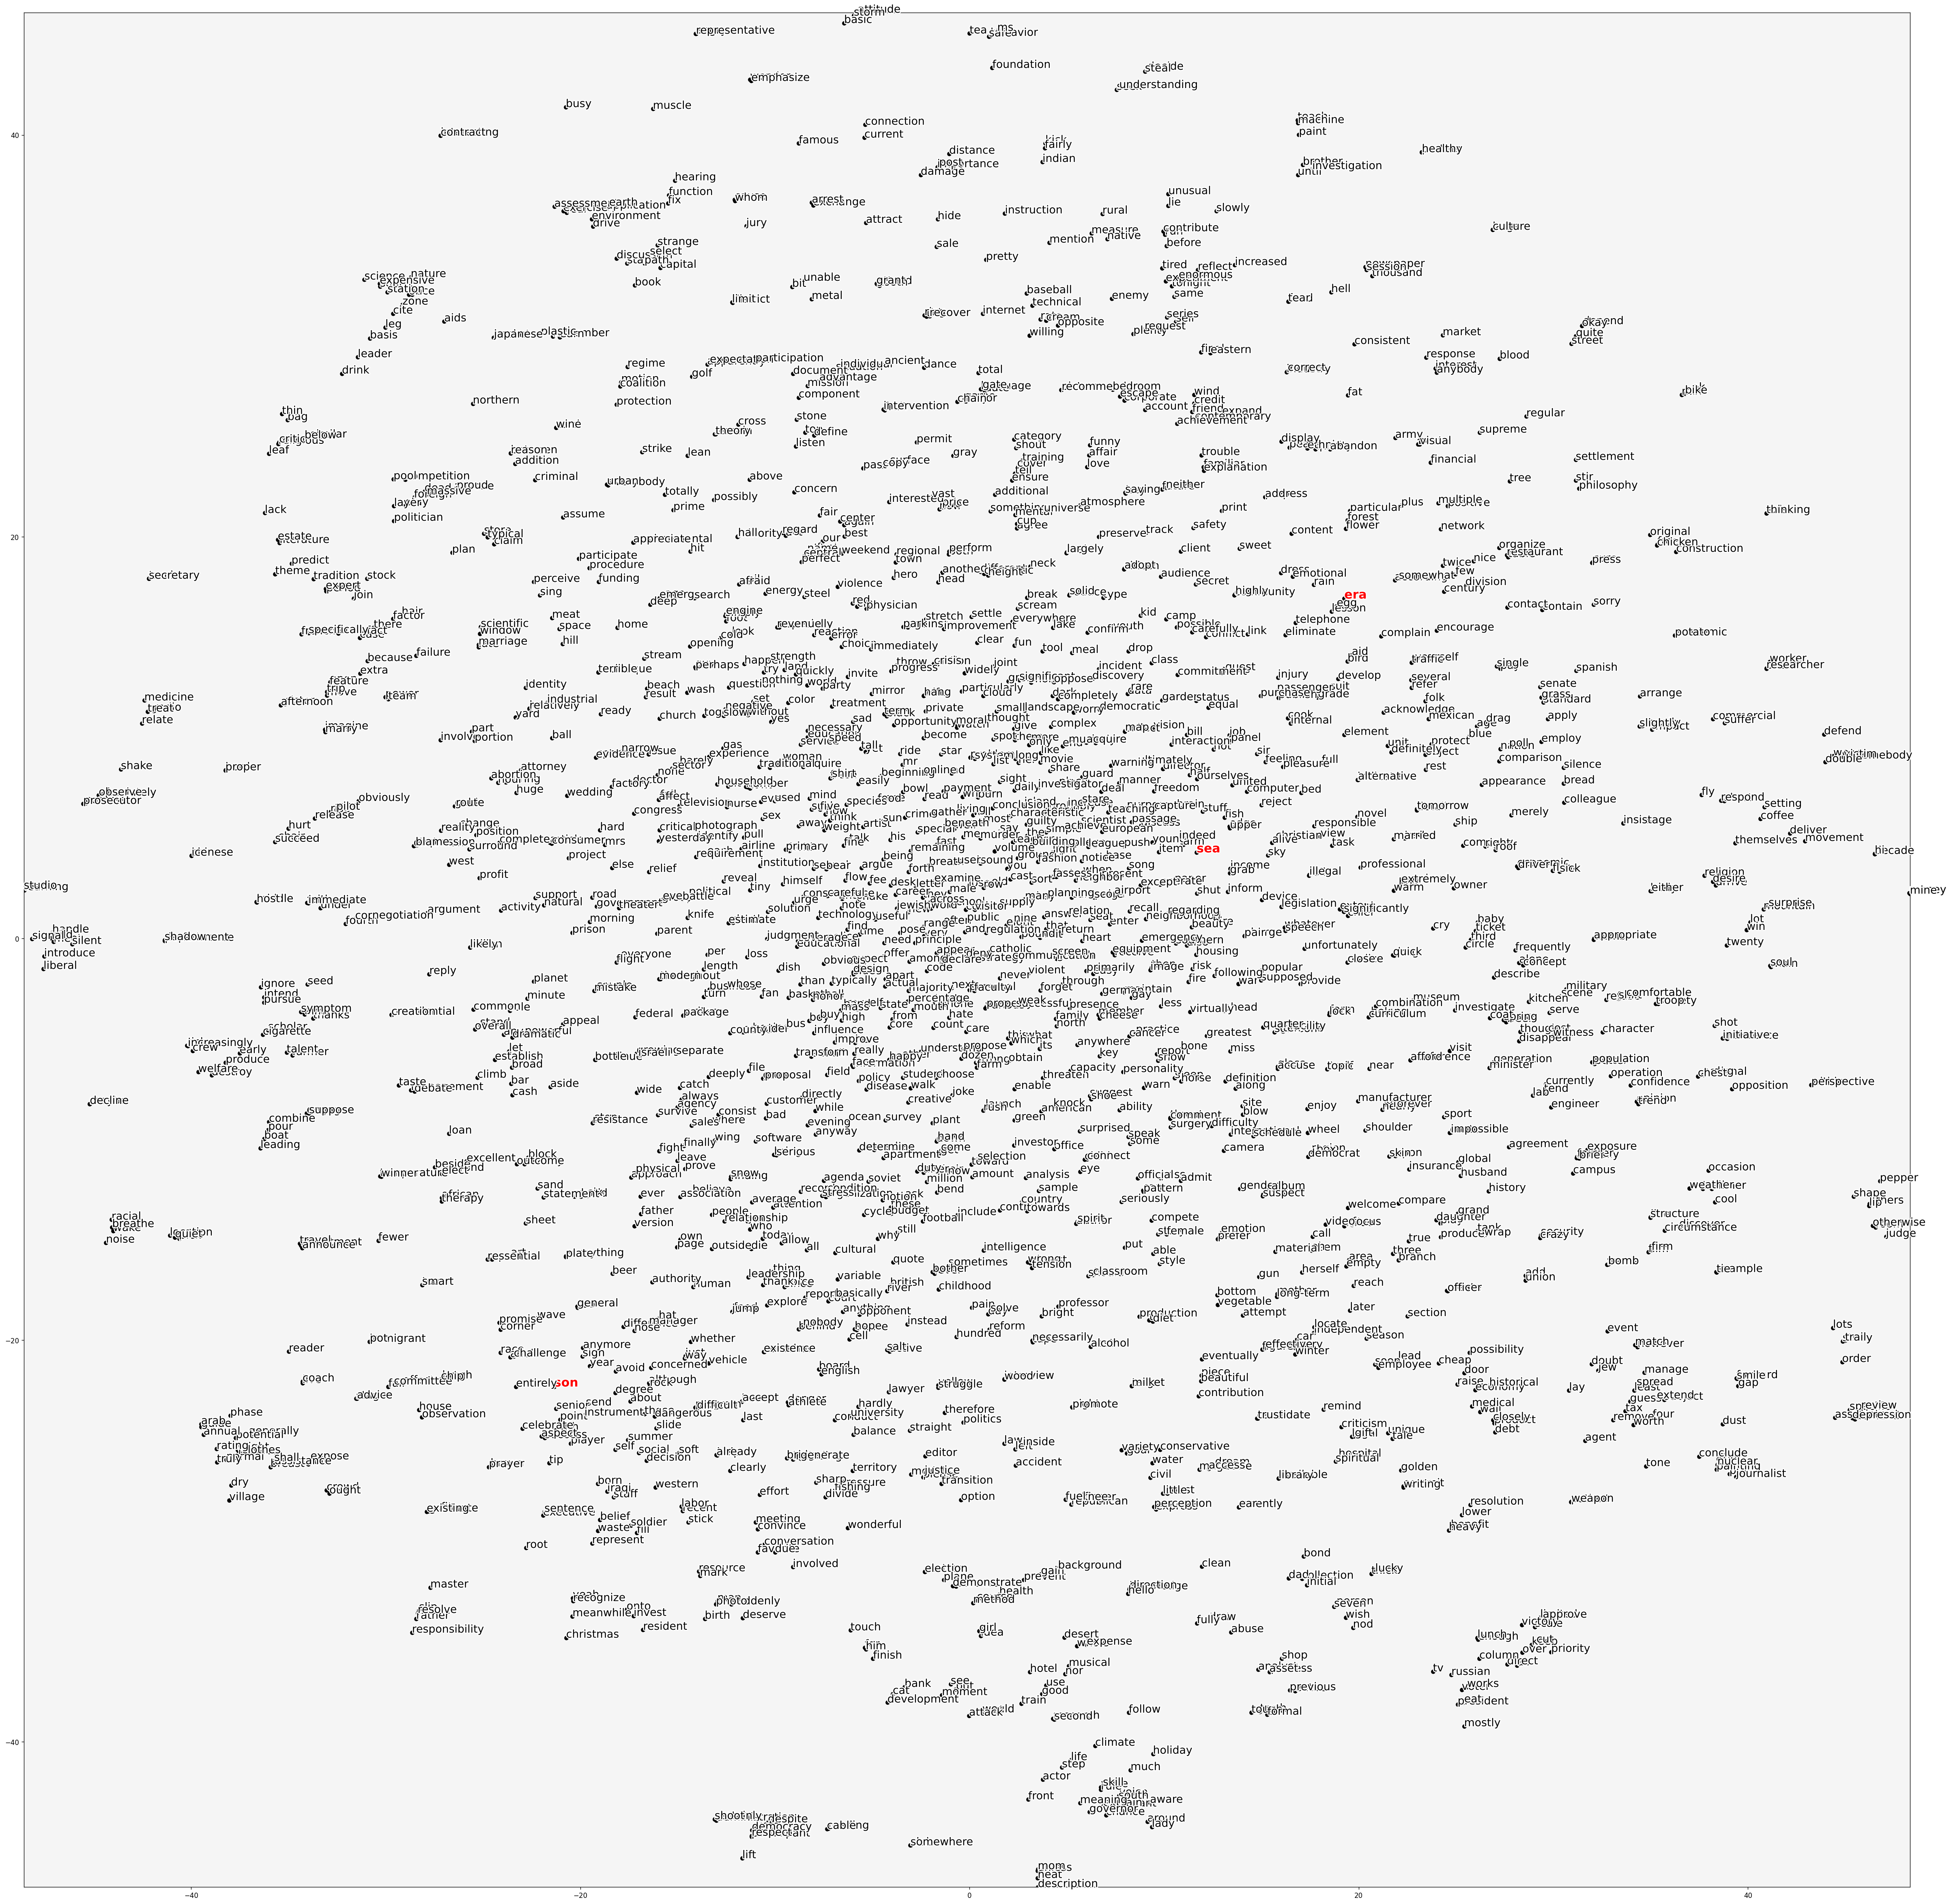

In [17]:
from matplotlib import patheffects
from nltk.corpus import stopwords
max_x , max_y = np.max(reduce_matrix, axis=0)
min_x , min_y = np.min(reduce_matrix, axis=0)

t_words = target_words


x, y = reduce_matrix[:, 0], reduce_matrix[:, 1]

plt.figure(figsize=(50, 50), dpi=120)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.scatter(x, y, s=30, color='black')






stop_words = stopwords.words('spanish')


for xi, yi, word in zip(x, y, t_words):
    if word in stop_words:
        plt.annotate(
            word, 
            (xi, yi), 
            fontsize=18, 
            color='red', 
            fontweight='bold',
            path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
        )
    elif word in ['politicos', 'corrupción', 'PRI', 'feliz', 
              'hermosa', 'chica', 'tu', 'hdp','madre','madres',
              '@usuario' ,'hijos', 'pendeja', 'pendejo','mierda', 
              'loca', 'hijo', 'hija', 'mamá', 'tía']:
        plt.annotate(
            word, 
            (xi, yi), 
            fontsize=22, 
            color='blue', 
            fontweight='bold',
            path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
        )
    else:
        plt.annotate(
            word, 
            (xi, yi), 
            fontsize=16, 
            color='black',
            path_effects=[patheffects.withStroke(linewidth=3, foreground="white")]
        )

plt.gca().set_facecolor('whitesmoke')
plt.show()


In [18]:
def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(int(len(data)/2)):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+int(len(data)/2)],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
                )
  

In [19]:
def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]



countries = ['USA', 'Colombia', 'Brazil', 'Venezuela', 'France', 'Spain', 'Egypt', 'China']

presidents = [analogy('Mexico', 'taco', country) for country in countries]

pp(zip(countries,presidents))

           0          1
0        USA     burger
1   Colombia      tacos
2     Brazil    rodizio
3  Venezuela     arepas
4     France  baguettes
5      Spain     paella
6      Egypt    falafel
7      China     noodle


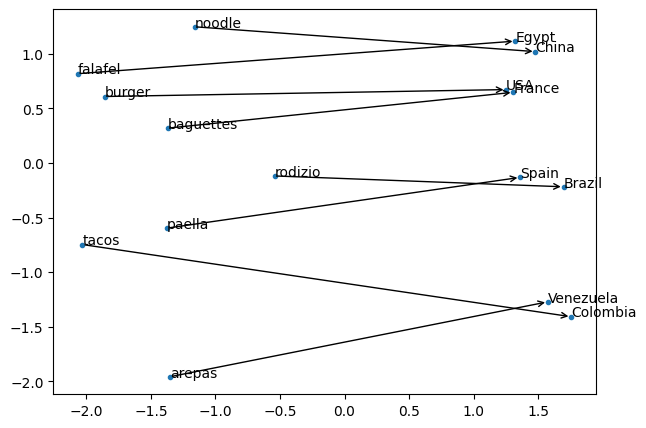

In [20]:
labels = countries + presidents
data = [model[w] for w in labels]
plot_data(data, labels)

 La manera de ver diferente con tcor vs esta manera de word2vec y esto es diferente por que mientras tcor es la concurrencia entre las palabras pero mientras que word2vec es la prediccion de una palabra a partir de otra. y esto cambia todooooo, aparte es mucho mas eficiente y si algo podemos decir es que ya no tenemos un diccionario gigante de coocurrencias, sino que tenemos un modelo que aprende a predecir palabras a partir de otras y eso es mucho mas eficiente. por ejemplo las stop words en este caso ni aparecen y tampoco las pálabras que son seleccionadas por mi no aparecen si bien es por la diferencia de idioma tambien influtye en que los vectores de emmbedings son armados diferentemebnte